In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
X_train = train_images.astype('float32') / 255.0
X_test = test_images.astype('float32') / 255.0


In [3]:
y_train = train_labels
y_test = test_labels


In [4]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras  # Import Keras from TensorFlow
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer

model = keras.Sequential()
model.add(keras.layers.Reshape((28, 28), input_shape=(28, 28)))
model.add(keras.layers.LSTM(128, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

# Define a learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

# Create an optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,874 (862.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 74ms/step - accuracy: 0.7611 - loss: 0.7180 - val_accuracy: 0.9623 - val_loss: 0.1189
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 74ms/step - accuracy: 0.9659 - loss: 0.1191 - val_accuracy: 0.9742 - val_loss: 0.0877
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.9769 - loss: 0.0809 - val_accuracy: 0.9830 - val_loss: 0.0573


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


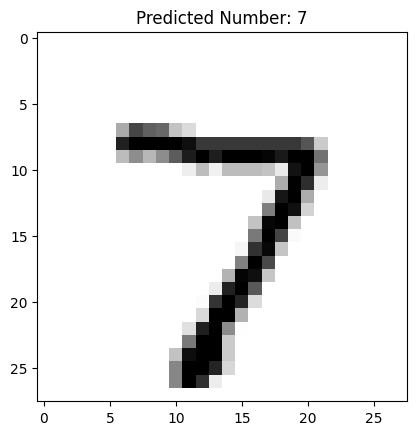

Predicted Number: 7


In [5]:
import matplotlib.pyplot as plt

def predict_number(input_image):
    # Preprocess the input image (assuming it's a grayscale image)
    input_image = input_image.astype('float32') / 255.0
    input_image = np.reshape(input_image, (1, 28, 28))  # Reshape to match the model's input shape

    prediction = model.predict(input_image)

    predicted_number = np.argmax(prediction)

    return predicted_number

input_image = test_images[0]  # Replace with your own image
predicted_number = predict_number(input_image)

plt.imshow(input_image.reshape((28, 28)), cmap=plt.cm.binary)
plt.title(f"Predicted Number: {predicted_number}")
plt.show()


print("Predicted Number:", predicted_number)


In [6]:
# Assuming 'model' is your trained Keras model

# Save the trained model to the current working directory in Colab
model.save('my_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


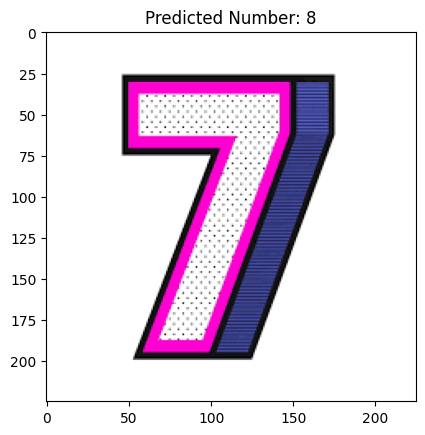

Predicted Number: 8


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Load your trained model (replace 'my_model.h5' with your model's filename)
model = load_model('my_model.h5')

# Define a function to predict the number from an input image file
def predict_number_from_image(image_path):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.reshape(img_array, (1, 28, 28, 1))  # Reshape to match the model's input shape

    # Make a prediction using the trained model
    prediction = model.predict(img_array)

    # Get the index of the class with the highest probability
    predicted_number = np.argmax(prediction)

    return predicted_number

# Example usage:
# Provide an input image (as a file path)
# Replace 'your_image_path.png' with the path to your image file
input_image_path = '/content/images (1).png'

predicted_number = predict_number_from_image(input_image_path)

# Load and display the input image
img = Image.open(input_image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Number: {predicted_number}")
plt.show()

# Print the predicted number
print("Predicted Number:", predicted_number)
